<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

>[Поиск по изображениям](#scrollTo=uAM1FqkBOGI7)

>>[Описание проекта](#scrollTo=1-qZW5gX92qO)

>>[Исследовательский анализ данных](#scrollTo=xn9QeLJ2OFvo)

>>[Проверка данных](#scrollTo=Su4PPAbxN8fQ)

>>[Обучение модели предсказания соответствия](#scrollTo=E3n5EPEDGmxJ)

>>[Тестирование модели](#scrollTo=l8bI9Fnjb432)

>>[Общий вывод](#scrollTo=b8lmV8Jm_CAg)



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
На мой взгляд содержание дожлно облечать работу с проектом. Но когда для его пролистывания нужно прокрутить 3-4 экрана и на одном экране мы видим только 6 пунктов содержания это не очень удобно.  

</div>

# Поиск по изображениям

## Описание проекта

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

## Исследовательский анализ данных

In [1]:
# Загружаем бибилотеки.
import pandas as pd
import math
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords 
import spacy
import numpy as np
import re
from sklearn.model_selection import GroupShuffleSplit
from torchvision.models import resnet50, ResNet50_Weights
tqdm.pandas()
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from math import sqrt, ceil
import os.path

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

https://drive.google.com/file/d/1s27p9B3gYrEg1cPUChcR82w5ajumtdnV/view?usp=share_link

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием path, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
    
Обычно в этом месте я пишу "  Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз." Но парадокс в том, что пути на 100% совпали с моими, т.к. проверял я тоже в Colab. Однако hardcode это зло и лучше от него избавиться.
    
    
Кстати, ты можешь использоввать вот такой код для загрузки датасета с сервера Яндекса
    
    !wget -q https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
    !unzip -q dsplus_integrated_project_4.zip
    
Или попробуй найти библиотеку gdown, она удобна для загрузки датасетов, сохраненных на гугл-драйв.    


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>

Привет!
Про эти замечательные командызнаю, использую в калабе. Убрал что бы не смущали.
</div>

In [2]:
#! gdown 1s27p9B3gYrEg1cPUChcR82w5ajumtdnV

In [3]:
#! unzip /content/to_upload.zip -d /content/

In [4]:
PATH = '/content/to_upload'

In [5]:
# Загружаем датасет с запросами картинками.
train = pd.read_csv(os.path.join(PATH,'train_dataset.csv'))

In [6]:
train.sample(10) # Проверяем загрузку данных.

image                     query_id  \
5022  3280052365_c4644bf0a5.jpg   261490838_2f3ac98b12.jpg#2   
5600  3044536048_e615466e7f.jpg  1982852140_56425fa7a2.jpg#2   
2015  3287549827_04dec6fb6e.jpg  1472230829_803818a383.jpg#2   
2635  1517721825_10176d0683.jpg  3347798761_5c5260b000.jpg#2   
3251   373394550_1b2296b8c4.jpg   353180303_6a24179c50.jpg#2   
1125  1287073593_f3d2a62455.jpg  2933912528_52b05f84a1.jpg#2   
3453  3571147934_d1c8af1d6e.jpg  3571147934_d1c8af1d6e.jpg#2   
4805  2521770311_3086ca90de.jpg  2693425189_47740c22ed.jpg#2   
4429   486712504_36be449055.jpg  2124040721_bffc0a091a.jpg#2   
3750   532457586_bddfc5251d.jpg  2682382530_f9f8fd1e89.jpg#2   

                                             query_text  
5022  A dog chasing a deer in a field of yellow flow...  
5600  Two people run down the beach and one of them ...  
2015                            Rafting boat on river .  
2635  A motorbiker racer performs an aerial stunt as...  
3251    A showgirl puts on her lipstick in the mirror .  
1125                  Two black dogs run through sand .  
3453  Kids are waiting at the bottom of a staircase ...  
4805            a boy plays with a noodle by the pool .  
4429            An old man with white hair in a red hat  
3750  A young , fit man wearing short does a high ri...

In [7]:
# Загружаем датасет с оценками экспертов.
expert = pd.read_csv(os.path.join(PATH,'ExpertAnnotations.tsv'), sep='\t', header=None)

In [8]:
expert.sample(10) # Проверяем загрузку данных.

0                            1  2  3  4
678   2054869561_ff723e9eab.jpg  2854959952_3991a385ab.jpg#2  2  2  3
1227  2346401538_f5e8da66fc.jpg  3459156091_c1879ebe28.jpg#2  1  1  1
3698  3290105461_7590f23371.jpg  3470951932_27ed74eb0b.jpg#2  1  1  2
4292  3490736665_38710f4b91.jpg  3471841031_a949645ba8.jpg#2  1  1  1
4954  3702436188_2c26192fd0.jpg  3220126881_b0a4f7cccb.jpg#2  1  1  2
4868  3658427967_6e2e57458d.jpg  2396025708_e4a72e2558.jpg#2  1  2  2
1510   247637795_fdf26a03cf.jpg  3040033126_9f4b88261b.jpg#2  1  2  2
3141  3143982558_9e2d44c155.jpg  3564312955_716e86c48b.jpg#2  2  2  2
1218  2345984157_724823b1e4.jpg  3048597471_5697538daf.jpg#2  3  3  3
1998  2666205903_8d287669e1.jpg  1536774449_e16b1b6382.jpg#2  2  4  4

In [9]:
# Загружаем датасет данными краудсорсинга.
crowd = pd.read_csv(os.path.join(PATH, 'CrowdAnnotations.tsv'), sep='\t', header=None)

In [10]:
crowd.sample(10) # Проверяем загрузку данных.

0                            1         2  3  4
30960  3332467180_d72f9b067d.jpg   421322723_3470543368.jpg#2  0.000000  0  3
13263  2521770311_3086ca90de.jpg  2271755053_e1b1ec8442.jpg#2  0.000000  0  3
44506   505929313_7668f021ab.jpg  1626754053_81126b67b6.jpg#2  0.000000  0  3
20777  2926595608_69b22be8d4.jpg   405615014_03be7ef618.jpg#2  0.000000  0  3
33226  3424424006_98f9d1921c.jpg  3162045919_c2decbb69b.jpg#2  0.000000  0  3
45640   537559285_29be110134.jpg  3523559027_a65619a34b.jpg#2  0.000000  0  3
42412   416960865_048fd3f294.jpg  3287549827_04dec6fb6e.jpg#2  0.000000  0  3
21895  2984174290_a915748d77.jpg  3064383768_f6838f57da.jpg#2  0.666667  2  1
37685  3571147934_d1c8af1d6e.jpg  2529116152_4331dabf50.jpg#2  0.333333  1  2
20419  2913965136_2d00136697.jpg   293327462_20dee0de56.jpg#2  0.000000  0  3

In [11]:
expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5822 non-null   object
 1   1       5822 non-null   object
 2   2       5822 non-null   int64 
 3   3       5822 non-null   int64 
 4   4       5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [12]:
crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [14]:
# Переименуем колонки.
expert.columns = ['image', 'query_id', 'ex_1', 'ex_2', 'ex_3']

In [15]:
# Переименуем колонки.
crowd.columns = ['image', 'query_id', 'fraction', 'consonants', 'dissenters']

In [16]:
# Присоединим оценки экспертов.
train = train.merge(expert, how='left', on=['image', 'query_id'])

In [17]:
# Проверим результат.
train.sample(10)

image                     query_id  \
1460  1343426964_cde3fb54e8.jpg   300550441_f44ec3701a.jpg#2   
310   2909875716_25c8652614.jpg  2534502836_7a75305655.jpg#2   
3554  2682382530_f9f8fd1e89.jpg  3741462565_cc35966b7a.jpg#2   
3564   542179694_e170e9e465.jpg  3523471597_87e0bf3b21.jpg#2   
3430  2054869561_ff723e9eab.jpg  2854959952_3991a385ab.jpg#2   
1101   343218198_1ca90e0734.jpg  3155987659_b9ea318dd3.jpg#2   
2236  3085226474_62aba51179.jpg  2662845514_8620aaee96.jpg#2   
1917  1392272228_cf104086e6.jpg  2938747424_64e64784f0.jpg#2   
2550   339658315_fbb178c252.jpg  3688858505_e8afd1475d.jpg#2   
681    256085101_2c2617c5d0.jpg  2723477522_d89f5ac62b.jpg#2   

                                             query_text  ex_1  ex_2  ex_3  
1460  A woman with a scarf on her head walks down a ...     1     1     1  
310   A small brown and white dog running through ta...     2     2     2  
3554  A young girl dressed in pink with a hair barre...     1     1     1  
3564                          Tourists examine a sign .     1     1     1  
3430        two dogs jump for a ball on a green field .     2     2     3  
1101   A dog jumps to catch a red Frisbee in the yard .     2     2     3  
2236                  A martial artist breaks a brick .     1     1     1  
1917  A white dog is running through the water onto ...     2     3     3  
2550                     A girl is wear a green dress .     2     2     2  
681   The large brown dog is chasing after the littl...     2     2     2

In [18]:
# Присоединим данные краудсорсинга.
train = train.merge(crowd,  how='left', on=['image', 'query_id'])

In [19]:
train.info() # Проверим общий результат.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5822 non-null   object 
 1   query_id    5822 non-null   object 
 2   query_text  5822 non-null   object 
 3   ex_1        5822 non-null   int64  
 4   ex_2        5822 non-null   int64  
 5   ex_3        5822 non-null   int64  
 6   fraction    2329 non-null   float64
 7   consonants  2329 non-null   float64
 8   dissenters  2329 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 454.8+ KB


In [20]:
# Функция expert_score предназначена для выдачи обобщенной оценки экспертов, на вход принемет строку датасета.

def expert_score(row):
  if (row['ex_1'] == row['ex_2']) or (row['ex_1'] == row['ex_3']):
    return row['ex_1']
  elif (row['ex_2'] == row['ex_3']):
    return row['ex_2']
  else:
    return 0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>Совет</b>  Вижу что у тебя появились отступы в 2 пробела (хотя PEP8 советует 4 проблела). И я знаю откуда они взялись. Дело в том, что редактор Google Colab почему-то по умолчанию ставит отступы в 2 пробела. Но это легко исправить: правый верхний угол, настройки (шестеренка), находим редактор и меняем отступы по умолчанию с 2 на 4 пробела. </div>

In [21]:
# Считаем обобщеную оценку экспертов.
train['expert_score'] = train.apply(expert_score, axis=1)

In [22]:
train.sample(10) # Проверим результат.

image                     query_id  \
4194  2206960564_325ed0c7ae.jpg   326456451_effadbbe49.jpg#2   
888   1348304997_afe60a61df.jpg  3074842262_62b1b2168c.jpg#2   
2184  1425069308_488e5fcf9d.jpg  2251747182_6b67a3ab8b.jpg#2   
4529  2534502836_7a75305655.jpg   447111935_5af98563e3.jpg#2   
2243   261490838_2f3ac98b12.jpg   293879742_5fe0ffd894.jpg#2   
804   3658427967_6e2e57458d.jpg  3218480482_66af7587c8.jpg#2   
2612  3295391572_cbfde03a10.jpg  3222055946_45f7293bb2.jpg#2   
4012  2929506802_5432054d77.jpg  2300168895_a9b83e16fc.jpg#2   
3657   241345905_5826a72da1.jpg  3523874798_9ba2fa46e3.jpg#2   
3091  2283966256_70317e1759.jpg   136552115_6dc3e7231c.jpg#2   

                                             query_text  ex_1  ex_2  ex_3  \
4194                             A rottweiler running .     2     3     3   
888   A kid in a blue top leaps into a raked pile of...     2     2     2   
2184  A young boy , playing basketball , is getting ...     1     1     1   
4529  Two dogs wearing shirts play in the green grass .     2     2     3   
2243  A dog jumping off a fence and another dog on t...     2     2     2   
804   A Miami basketball player dribbles by an Arizo...     1     1     1   
2612                     Basketball players in action .     1     1     1   
4012                       A brown dog sitting on grass     1     2     2   
3657  A little boy in a helmet is doing tricks on a ...     1     1     2   
3091  A mountain biker is jumping his bike over a ro...     1     1     1   

      fraction  consonants  dissenters  expert_score  
4194  0.333333         1.0         2.0             3  
888        NaN         NaN         NaN             2  
2184       NaN         NaN         NaN             1  
4529  0.000000         0.0         3.0             2  
2243       NaN         NaN         NaN             2  
804        NaN         NaN         NaN             1  
2612       NaN         NaN         NaN             1  
4012       NaN         NaN         NaN             2  
3657       NaN         NaN         NaN             1  
3091       NaN         NaN         NaN             1

In [23]:
train[train['expert_score'] == 0]['image'].count() # Количество записей, где эксперты не определились.

126

In [24]:
train = train[train['expert_score'] != 0].copy() # Удалим записи, где эксперты не определились.

In [25]:
# Функция xpert_score_norm предназначена для первода оценок экспертов в диапазон от 0 до 1, на вход принемеn число.
def expert_score_norm(x):
  if x == 4:
    return 1
  elif x == 3:
    return 2 / 3
  elif x == 2:
    return 1 / 3
  else:
    return 0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, но можно гораздо проще.  Применяем простое линейное преобразование (x-1) / 3 </div>

In [26]:
# Проводим первод оценки экспертов. 
train['expert_score_norm'] = train['expert_score'].apply(expert_score_norm)

In [27]:
train.sample(10) # Проверим результат.

image                     query_id  \
726   1220401002_3f44b1f3f7.jpg  3470951932_27ed74eb0b.jpg#2   
5415  3285993030_87b0f1d202.jpg   384577800_fc325af410.jpg#2   
3662  3079787482_0757e9d167.jpg  2120411340_104eb610b1.jpg#2   
3692  3259991972_fce3ab18b2.jpg  3425835357_204e620a66.jpg#2   
2214   245252561_4f20f1c89e.jpg  3363750526_efcedc47a9.jpg#2   
2380   500446858_125702b296.jpg   500446858_125702b296.jpg#2   
4755  3432550415_e7b77232de.jpg  2884420269_225d27f242.jpg#2   
4769   493621130_152bdd4e91.jpg   352382023_7605223d1c.jpg#2   
2417  1962729184_6996e128e7.jpg  2182488373_df73c7cc09.jpg#2   
5014  2554081584_233bdf289a.jpg  3393343330_b13df4d8ec.jpg#2   

                                             query_text  ex_1  ex_2  ex_3  \
726                     A boy runs to a baseball base .     1     1     1   
5415  A Sheltie dog carries a white-colored toy in i...     2     2     3   
3662  A white dog looks at a nervous cow in a mounta...     1     1     1   
3692  A man is standing on his hands on a sidewalk w...     4     4     4   
2214                  Black and white dog on wet sand .     3     3     4   
2380  A white dog is running on gravel away from two...     4     4     4   
4755  two men posing with their legs up with a train...     1     1     2   
4769  A large brown dog with a stick in his mouth co...     2     2     2   
2417  People are standing on the Hollywood walk of f...     3     3     3   
5014  A man is sitting at a table full of military i...     1     1     1   

      fraction  consonants  dissenters  expert_score  expert_score_norm  
726        NaN         NaN         NaN             1           0.000000  
5415  0.000000         0.0         3.0             2           0.333333  
3662       NaN         NaN         NaN             1           0.000000  
3692  0.666667         2.0         1.0             4           1.000000  
2214  0.333333         1.0         2.0             3           0.666667  
2380  1.000000         3.0         0.0             4           1.000000  
4755       NaN         NaN         NaN             1           0.000000  
4769  0.333333         1.0         2.0             2           0.333333  
2417  0.000000         0.0         3.0             3           0.666667  
5014       NaN         NaN         NaN             1           0.000000

In [28]:
# Функция score расчитывает обобщеную оценку экспертов и краудсорсинга, на вход принемет строку датасета.
def score(row):
  if math.isnan(row['fraction']) :
    return row['expert_score_norm']
  else:
    return round(0.6 * row['expert_score_norm'] + 0.4 * row['fraction'], 3)

In [29]:
 # Рассчитываем обобщению оценку.
train['score'] = train.apply(score, axis=1)

In [30]:
train.sample(10) # Проверим результат.

image                     query_id  \
5117  3186073578_6e115f45f5.jpg  3364861247_d590fa170d.jpg#2   
4539  3605061440_1d08c80a57.jpg   197504190_fd1fc3d4b7.jpg#2   
1680  1402640441_81978e32a9.jpg  2878272032_fda05ffac7.jpg#2   
5473  3596131692_91b8a05606.jpg  3596131692_91b8a05606.jpg#2   
4109  2933912528_52b05f84a1.jpg  2891617125_f939f604c7.jpg#2   
1093  1282392036_5a0328eb86.jpg  3155987659_b9ea318dd3.jpg#2   
358   1122944218_8eb3607403.jpg  3220126881_b0a4f7cccb.jpg#2   
4882  2450299735_62c095f40e.jpg  2677656448_6b7e7702af.jpg#2   
4625  2317714088_bcd081f926.jpg  1389264266_8170bc1c54.jpg#2   
2494  3364151356_eecd07a23e.jpg  3128164023_ebe8da4c32.jpg#2   

                                             query_text  ex_1  ex_2  ex_3  \
5117  A woman in a pink sweater looks pensive next t...     1     1     1   
4539    Two children playing with a ball on the grass .     2     2     2   
1680                           dogs playing in a stream     1     1     1   
5473  Three children in neon colors play soccer whil...     4     4     4   
4109  A person on a dirt bike is riding up a sandy h...     1     1     1   
1093   A dog jumps to catch a red Frisbee in the yard .     1     1     1   
358           Two men and a woman smile at the camera .     1     1     1   
4882              A dog swims in a pool near a person .     2     2     3   
4625                Two girls walking down the street .     1     2     2   
2494  Two dogs , identical white with brown spots wr...     2     2     2   

      fraction  consonants  dissenters  expert_score  expert_score_norm  \
5117       NaN         NaN         NaN             1           0.000000   
4539       0.0         0.0         3.0             2           0.333333   
1680       0.0         0.0         3.0             1           0.000000   
5473       1.0         3.0         0.0             4           1.000000   
4109       NaN         NaN         NaN             1           0.000000   
1093       0.0         0.0         3.0             1           0.000000   
358        0.0         0.0         3.0             1           0.000000   
4882       NaN         NaN         NaN             2           0.333333   
4625       NaN         NaN         NaN             2           0.333333   
2494       NaN         NaN         NaN             2           0.333333   

         score  
5117  0.000000  
4539  0.200000  
1680  0.000000  
5473  1.000000  
4109  0.000000  
1093  0.000000  
358   0.000000  
4882  0.333333  
4625  0.333333  
2494  0.333333

### Вывод

- Все датасеты загрузились и содержат данные;
- Количество записей в датасете train и expert совпадает, при объединении этих датасетов количество записей не изменяется, что говорит о полном их ссответвии;
- Датасет crowd содержит значительно больше записей, но при обединении видно что нет полного перекрытия, что странно;
- Пересчитали оценки, где не было оценок краудсорсинга использовал оценоку экпертов, где были использовал обобщеную в пропорции 60/40 эксперты/краудсорсинг.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 ОК, ты объединил датафреймы и получил усредненные оценки. Но давай подумаем, извлекли ли мы всё полезное из доступных данных

У нас есть 5822 оценок экспертов и около 48К краудсорсинговых. 
    
Ты испльзовал left join и оставил   5822 оценок. Но если использовать outer join то оцененных пар изображение / описание будет гораздо больше (около 50_000).  
    
  Было бы неплохо использовать все. Если есть и те и другие - использовать взвешенную сумму, а если есть только одни - то использовать те что есть. 
 
    
Для таких сложных проектов, данные имеют огромную ценность и просто так ими раскидываться - это моветон. Тем более, что на их сбор скорее всего тратились силы и деньги. 
</div>

## Проверка данных

### Юридические ограничения

In [31]:
# Список запрещенных слов.
legal_restrictions = [
    'child',
    'boy',
    'kid',
    'girl',
    'baby',
    'infant',
    'newborn'
]

In [32]:
# Загрузим spacy.
nlp = spacy.load("en_core_web_sm")

In [33]:
# Функция лемматизируем на основе Spacy, навход принемает текст.
def text_preprocessing_spacy(text):
  text = re.sub(re.compile('<.*?>'), '', text)
  text = re.sub('[^A-Za-z ]', ' ', text).lower()
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])

In [34]:
# Создаем лемму запроса.
train['lemm_text'] = train['query_text'].progress_apply(lambda text: text_preprocessing_spacy(text))

100%|██████████| 5696/5696 [00:40<00:00, 139.56it/s]


In [35]:
train['lemm_text'].sample(10) # Проверим результат.

4467       child in blue trunk splash in blue kiddie pool
2614                        basketball player in action  
745      a little boy be jump into an outdoor kiddie pool
1678    a greyhound wear a muzzle and the number six o...
3983    a woman wear sunglass and a black coat as she ...
701                      two puppy be play in the leave  
3981    a person stand at the top of a mountain and ra...
1703         a little boy in navy blue be run very fast  
5659    a boy be inside hold something on top of his h...
2585     a man in red push his motocross bike up a rock  
Name: lemm_text, dtype: object

In [36]:
# Найдем изображения, где есть хоть небольшее совпадение со списком слов.
forbidden_images = train[(train['lemm_text'].str.contains('|'.join(legal_restrictions))) & (train['score'] > 0.5 )]['image'].unique()

In [37]:
len(forbidden_images) # Количество запретных изображений.

86

In [38]:
# Убираем их из датасета
clean_train = train[~train['image'].isin(forbidden_images)].copy()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, что не просто удалил все тексты, где есть "детская тематика", но и учел что оценка соответствия пары текст-изображение должно подтверждаться оценкой.
 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Но меня смущает, что ты используешь порог равный 0.  Возможно стоит поднять его до 0,5?
    
 
И есть второй второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

In [39]:
clean_train.sample(10) # Проверим результат.

image                     query_id  \
3215   256085101_2c2617c5d0.jpg   219301555_17883a51bd.jpg#2   
933   1267711451_e2a754b4f8.jpg  3216926094_bc975e84b9.jpg#2   
1056    96420612_feb18fc6c6.jpg  3562050678_4196a7fff3.jpg#2   
1815  2206960564_325ed0c7ae.jpg   670609997_5c7fdb3f0b.jpg#2   
5169  2966552760_e65b22cd26.jpg  3358558292_6ab14193ed.jpg#2   
3815  3220650628_4ed964e5b4.jpg  3350786891_6d39b234e9.jpg#2   
5404  2796801478_8ebd7e550b.jpg  3179336562_c3d0c0a3bd.jpg#2   
3357  1998457059_c9ac9a1e1a.jpg  1392272228_cf104086e6.jpg#2   
4792   421730441_6b2267fd31.jpg   241346508_0b3907a95b.jpg#2   
1809   246055693_ccb69ac5c6.jpg   293881927_ac62900fd4.jpg#2   

                                             query_text  ex_1  ex_2  ex_3  \
3215  A woman wading through a pool in front of a wa...     1     1     1   
933        A dog running with a blue toy in its mouth .     2     3     3   
1056  People are standing around a scenic lookout on...     1     1     2   
1815  A black dog jumps for a Frisbee in a backyard ...     1     1     1   
5169  The room full of youths reacts emotionally as ...     1     2     2   
3815  a group of people sitting outside in the dirt ...     2     2     3   
5404  a large graffitied skateboarding ramp with a c...     2     3     3   
3357  A black dog is coming out of the ocean water o...     1     2     2   
4792  The football players in red are attempting a p...     1     1     1   
1809                            The dog is on the fence     2     3     3   

      fraction  consonants  dissenters  expert_score  expert_score_norm  \
3215       NaN         NaN         NaN             1           0.000000   
933   0.333333         1.0         2.0             3           0.666667   
1056       NaN         NaN         NaN             1           0.000000   
1815  0.000000         0.0         3.0             1           0.000000   
5169       NaN         NaN         NaN             2           0.333333   
3815  0.000000         0.0         3.0             2           0.333333   
5404  0.333333         1.0         2.0             3           0.666667   
3357  0.000000         0.0         3.0             2           0.333333   
4792       NaN         NaN         NaN             1           0.000000   
1809  0.000000         0.0         3.0             3           0.666667   

         score                                          lemm_text  
3215  0.000000  a woman wade through a pool in front of a wate...  
933   0.533000           a dog run with a blue toy in its mouth    
1056  0.000000  people be stand around a scenic lookout on a s...  
1815  0.000000  a black dog jump for a frisbee in a backyard w...  
5169  0.333333  the room full of youth react emotionally as th...  
3815  0.200000  a group of people sit outside in the dirt on t...  
5404  0.533000  a large graffitie skateboard ramp with a coupl...  
3357  0.200000  a black dog be come out of the ocean water on ...  
4792  0.000000  the football player in red be attempt a play a...  
1809  0.400000                            the dog be on the fence

In [40]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5212 entries, 0 to 5821
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              5212 non-null   object 
 1   query_id           5212 non-null   object 
 2   query_text         5212 non-null   object 
 3   ex_1               5212 non-null   int64  
 4   ex_2               5212 non-null   int64  
 5   ex_3               5212 non-null   int64  
 6   fraction           2017 non-null   float64
 7   consonants         2017 non-null   float64
 8   dissenters         2017 non-null   float64
 9   expert_score       5212 non-null   int64  
 10  expert_score_norm  5212 non-null   float64
 11  score              5212 non-null   float64
 12  lemm_text          5212 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 570.1+ KB


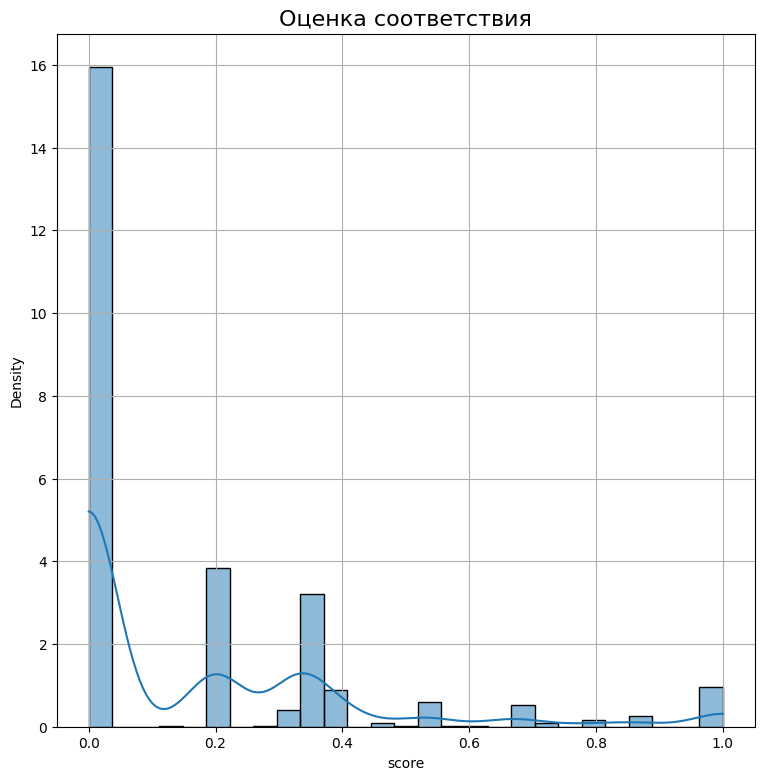

In [41]:
# Строим гистаграмму по возрасту машины.
plt.subplots(figsize=(9, 9))
plt.title('Оценка соответствия', fontsize=16)
sns.histplot(      # гистограммы плотности
            clean_train['score'],
            kde=True,
            stat="density", 
            linewidth=1)       
plt.grid(True)
plt.show()

In [42]:
print('Среднее по оценке', round(clean_train['score'].mean(), 3))

Среднее по оценке 0.164


In [43]:
clean_train = clean_train[['image','lemm_text', 'score']].reset_index(drop=True) # Переформеруем индексы, необходимо для разделения.

#### Вывод по результатам обработки 

- Для соблюдения юредических ограничений пришлось удалить 1/3 всех изображений, если бы не поставили ограничения на оценку пришлось бы удалить почти 70%;
- Средняя оценка 0.18 довольно низкая очень мало картинок, которые полностью соответсвуют описанию, и не понятно, что именно на картинке этому описанию соответствует огда описание неже 0.5 скажем.

### Векторизация изображений

In [44]:
# Разбиваем на train и test.
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=clean_train.drop(columns=['score']), y=clean_train['score'], groups=clean_train['image']))
train_df, test_df = clean_train.loc[train_indices], clean_train.loc[test_indices]
print(train_df.shape)
print(test_df.shape)

(3634, 3)
(1578, 3)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

**Коментарий** - разбиение сделал перед векторизацией, это связана с тем что возвращаятся с тензеров в DF, почти невозможно ресурсов, не хватает.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Нет необходимости превращать большие массивы данных в датафреймы перед разбиением на выборки. train_test_split отлично работает с numpy массивами (которые хранят данные в гораздо более компактном виде) </div>

In [45]:
# Для оптимиза работы при векторизации изображений, отсортируем датасеты по изображениям.
train_df = train_df.sort_values(by='image')
test_df = test_df.sort_values(by='image')

In [46]:
# Подготовим списки изображений и количевто их упоменаний.
image_number_train = train_df['image'].value_counts(sort=False).reset_index()
image_number_test = test_df['image'].value_counts(sort=False).reset_index()

In [47]:
# Загружаем предобученную ResNet50.
resnet = resnet50(weights=ResNet50_Weights.DEFAULT)

In [48]:
for param in resnet.parameters():
    param.requires_grad_(False) 

In [49]:
resnet.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я знаю, что совет "отрезать" два последних слоя был в тренажере. Но на мой взгляд это ошибка и и я  настоятельно рекомендую отрезать только один последний слой, в этом случае размерность вектора признаков будет всего 2048 и нашим моделям будет проще работать.
    
    
Но есть еще одна хитрость. Можно вообще ничего не отрезать. И получить вектор признаков длинной 1000. И это должно очень неплохо работать, т.к. каждый из 1000 признаков - это степень близости вектора какой-либо категории из ImageNet.   Это может быть очень интересный эксперимент.    

</div>

In [50]:
# Готовим трансформатор для подготовки картинок.
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
]) 

In [51]:
# Получаем вектор для тренировочных картинок.
all_img = []
for fail in tqdm(image_number_train['index'].values):
  img = Image.open(os.path.join(PATH, 'train_images', fail)).convert('RGB')
  image_tensor = preprocess(img)
  output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
  image_count = int(image_number_train[image_number_train['index'] == fail]['image'].values)
  for i in range(image_count):
    all_img.append(output_tensor)
  img.close() 

  0%|          | 0/639 [00:00<?, ?it/s]

In [52]:
# Получаем общий тренировочных  данных.
tain_img = torch.stack(all_img, 0)

In [53]:
# Проверяем размер.
tain_img.shape

torch.Size([3634, 1000])

In [54]:
# Получаем вектор для тестовых картинок.
all_img = []
for fail in tqdm(image_number_test['index'].values):
  img = Image.open(os.path.join(PATH, 'train_images', fail)).convert('RGB')
  image_tensor = preprocess(img)
  output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
  image_count = int(image_number_test[image_number_test['index'] == fail]['image'].values)
  for i in range(image_count):
    all_img.append(output_tensor)
  img.close() 

  0%|          | 0/275 [00:00<?, ?it/s]

In [55]:
# Получаем общий тензор тестовых данных.
test_img = torch.stack(all_img, 0)

In [56]:
# Проверяем размер.
test_img.shape

torch.Size([1578, 1000])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

### Векторизация текста

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Устанавливаем стоп слова.
stop_words = stopwords.words('english')
stop_words.remove('not')

In [59]:
# Перводим леммы в вектор.
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
count_tf_idf.fit(train_df['lemm_text'])
tf_idf_train = count_tf_idf.transform(train_df['lemm_text'])
tf_idf_test = count_tf_idf.transform(test_df['lemm_text'])

In [60]:
# Проверяем результат.
print(tf_idf_train.shape)
print(tf_idf_test.shape)

(3634, 1148)
(1578, 1148)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF.</div>

### Объединение векторов

In [61]:
# Перевод матрицы в тензоры.
tf_idf_train = torch.FloatTensor(tf_idf_train.toarray())

In [62]:
# Перевод матрицы в тензоры.
tf_idf_test = torch.FloatTensor(tf_idf_test.toarray())

In [63]:
# Проверяем результат
tf_idf_train.shape

torch.Size([3634, 1148])

In [64]:
# Конкатенируем вектора.
train_tensor= torch.cat((tain_img, tf_idf_train), -1)

In [65]:
# Конкатенируем вектора.
test_tensor = torch.cat((test_img, tf_idf_test), -1)

In [66]:
# Проверяем результат.
train_tensor.shape

torch.Size([3634, 2148])

In [67]:
# Проверяем результат.
test_tensor.shape

torch.Size([1578, 2148])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

### Выводы

- После векторизации изображения замер вектора составляет 100352 параметра для ResNet50 для ResNet18 он где-то 25к;
- Вектор же текста значительно меньше всего 1070, и это при условии что при векторизации параметр min_df не установлен, если мы попытаемя отбросить часть слов то получется где-то 400;
- Сильный перекос в сторону вектора изорражений, это может очень повлиять на моделирования, модели просто не замет вектор текста, темболее для нее нет разницы между этими параметрами;
- Перейти в датафрейм с таким тензором просто не получается, оперативная память заканчивается.   

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Обучение модели предсказания соответствия

В качестве, метрики выбрал RMSE, модели с ним работают быстрее. И дело тут не в мерике, а скорей в подходе.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### LinearRegression

In [68]:
%%time
lr = LinearRegression() # Обучим линейную регрессию.
lr.fit(train_tensor, train_df['score'])

CPU times: user 2.74 s, sys: 334 ms, total: 3.07 s
Wall time: 1.65 s


LinearRegression()

In [69]:
predicted_train = lr.predict(train_tensor)

In [70]:
round(mean_squared_error(train_df['score'], predicted_train) ** 0.5, 3) # Метрика на train.

0.202

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Линейная регрессия исследована. Но эта модель очень склонна к переобучению, поэтому я бы посоветовал использовать её родствениц с регуляризацией (l1/l2) </div>

### DecisionTree

In [71]:
parameters = {'max_depth': [12, 16], 
             'max_features':[400]} 

In [72]:
dtr = DecisionTreeRegressor(random_state=12345)

In [73]:
dtr_model = GridSearchCV(dtr, parameters, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1) #Задаем параметры модели и поиска.

In [74]:
%%time
dtr_model.fit(train_tensor, train_df['score']) # Обучим дерево решений.

CPU times: user 765 ms, sys: 338 ms, total: 1.1 s
Wall time: 7.05 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [12, 16], 'max_features': [400]},
             scoring='neg_root_mean_squared_error')

In [75]:
dtr_model.best_params_

{'max_depth': 12, 'max_features': 400}

In [76]:
predicted_train = dtr_model.best_estimator_.predict(train_tensor)

In [77]:
round(mean_squared_error(train_df['score'], predicted_train) ** 0.5, 3)  # Метрика на train.

0.165

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### RandomForest

In [78]:
parameters = {'n_estimators': [200],
                'max_depth': [12],
             'max_features':[400]}

In [79]:
rfr = RandomForestRegressor(random_state=12345)

In [80]:
rfr_model = GridSearchCV(rfr, parameters, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1) #Задаем параметры модели и поиска.

In [81]:
%%time
rfr_model.fit(train_tensor, train_df['score']) # Обучаем модель.

CPU times: user 59.3 s, sys: 241 ms, total: 59.5 s
Wall time: 3min 47s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [12], 'max_features': [400],
                         'n_estimators': [200]},
             scoring='neg_root_mean_squared_error')

In [82]:
predicted_train = rfr_model.best_estimator_.predict(train_tensor)

In [83]:
round(mean_squared_error(train_df['score'], predicted_train) ** 0.5, 3) # Метрика на train.

0.149

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Нейронная сеть

In [84]:
# Параметры НС.
n_in_neurons = train_tensor.shape[1]
n_hidden_neurons_1 = 400
n_hidden_neurons_2 = 10
n_out_neurons = 1
learning_rate = 0.001
num_epochs = 1000

In [85]:
# Создаем класс новой НС, определяем два метода.
class Baseline_new(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_hidden_neurons_2, n_out_neurons, p1, p2):
        super(Baseline_new, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=p1)
       
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=p2)
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.act3 = nn.Sigmoid()
       
       
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.act3(x)
       
        return x

In [86]:
net_parametrs = {
    'set_1': [100, 0, 0]
    #'set_2': [21, 0, 0],
    #'set_3': [84, 0.5, 0.25],
    #'set_4': [21, 0.5, 0.25],
    #'set_5': [84, 0.8, 0.25],
    #'set_6': [21, 0.8, 0.25],
}

In [87]:
rmse_train_set = ['rmse_train']
rmse_test_set = ['rmse_test']

In [88]:
y_train = torch.FloatTensor(train_df['score'].values)
y_test = torch.FloatTensor(test_df['score'].values)

In [89]:
# Запускаем обучение.
for sets, params in net_parametrs.items():
    
    net = Baseline_new(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, params[1], params[2])
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    loss = nn.MSELoss()
    batch_size = params[0]
    num_batches = ceil(len(train_tensor)/batch_size)
    
    for epoch in tqdm(range(num_epochs)):
        order = np.random.permutation(len(train_tensor))# создайте случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size # посчитайте номер стартового объекта батча
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size] # извлеките индексы объектов текущего обатча
            X_batch = train_tensor[batch_indexes]
            y_batch = y_train[batch_indexes]
            preds = net.forward(X_batch).flatten()
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()
    
    net.eval()
    
    pred_train = net.forward(train_tensor).detach().numpy()
    pred_test = net.forward(test_tensor).detach().numpy()
    rmse_train = sqrt(mean_squared_error(train_df['score'], pred_train))
    rmse_test = sqrt(mean_squared_error(test_df['score'], pred_test))
    rmse_train_set.append(rmse_train)
    rmse_test_set.append(rmse_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Нейронная сеть создана и ты её обучаешь. С этим все ОК.
    
Но извлекаешь ли ты максимум из архитектуры? На мой вгляд здесь нужно не столько уделить вниманию перебору возможных структур, сколько взять одну две архитектуры и попробовать действительно обучить их. Т.е. учить долго, мониторя метрики на трейне и валидации. Если модель перестала учиться - снижать lr и учить дальше. И останавливатсья только когда метрики на валидаци не снижаются.
    
    
А обучить  10 эпох и измерить качество модели - так не сработает.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>

Пробовал обучать и на 100 и на 1000 результат не менялся и снежал lr. Тут как уже было сказано не со всем в этом дело, а дело в отрезаных двух слоях. Идея с ResNet pаботает NN стала лучше работать. 
</div>

In [90]:
round(rmse_train, 3) # Метрика на train.

0.018

In [91]:
max(pred_train) # проверим качество предсказаний.

array([0.99976903], dtype=float32)

### Выводы

- Для LR не стал сильно углубляться т.к посути это просто подчет по формуле в своем итоге, длаее на тесте посомтрим дейсвительный результат ее работы.
- Для древянных моделей перепробывал много гиперпараметров на случайном дереве потом их просто перевел на лес, сильно они не дают прироста или улучшения. Тут дела в данных и их форме и в отработке ResNet.
- Нейро сеть пробовал все и состав и слои и функции активации и батчи, по итогу нейро сеть делает 2 вещи или ставить всем 0 (при больших внутрених слоях походу градиент просто затухает), или находит усредненое значени в районе 0.2 или плюс минус 0.05 выставляет остальные.
- Лес требует много ресурсов и часто вешает проект.
- Была идея попробовать Логистическую регрессию и сделать на скорах, но тут не бинарный таргет, и сильный дисбаланс. Хотя можно приветси к бинарному таргету посмотреть какой там будет roc auc и поиграть с порогом для улучшения precision.

## Тестирование модели

### Сравнение моделей

Буду проводить  тестирования на всех моделях для наглядности и обосновоности вывода. Т.к. это иследовательская работа думаю это допустимо.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, тем более что то,что ты называешь тестовыми данными это скорее валидационная выборка.</div>

In [92]:
# Посчитаем метрику случайной модели, все значению 0 по итогу картинка выбирается случайно та что сверху при сортировке. 
rmse_zeros = mean_squared_error(test_df['score'], np.zeros(len(test_df['score'])))**0.5
print(f'rmse случайной модели {rmse_zeros: .3f}')
random_m = ['random_model', round(rmse_zeros, 3)]

rmse случайной модели  0.299


In [93]:
predicted_test = lr.predict(test_tensor)

In [94]:
predicted_test = lr.predict(test_tensor)
rmse_lr = mean_squared_error(test_df['score'], predicted_test )**0.5
lr_m = ['LR', round(rmse_lr, 3)]

In [95]:
# Попробуем исправить работу LR. 
a = pd.Series(predicted_test).reset_index()

In [96]:
a[(a[0] < 0)] = 0 
a[(a[0] > 1)] = 1 

In [97]:
# Метрика исправленой модели.
rmse_lr_m = mean_squared_error(test_df['score'], a[0])**0.5
lr_m_mod = ['LR_limit', round(rmse_lr_m, 3)]

In [98]:
# Метрики для RForest.
predicted_test = dtr_model.best_estimator_.predict(test_tensor)
rmse_dtr = mean_squared_error(test_df['score'], predicted_test) ** 0.5
dtr_m = ['DTR', round(rmse_dtr, 3)]

In [99]:
# Метрики для DT.
predicted_test = rfr_model.best_estimator_.predict(test_tensor)
rmse_rfr = mean_squared_error(test_df['score'], predicted_test) ** 0.5
rfr_m = ['RFR', round(rmse_rfr, 3)]

In [100]:
# Метрика для NN.
nn_m = ['NN', round(rmse_test, 3)]

In [101]:
# Вывод по моделированию 
columns =[
    'model',
    'rmse'
]
data = []


data.append(random_m)
data.append(lr_m)
data.append(lr_m_mod)
data.append(dtr_m)
data.append(rfr_m)
data.append(nn_m)

pd.DataFrame(data=data, columns=columns)

model      rmse
0  random_model     0.299
1            LR  1197.293
2      LR_limit     0.653
3           DTR     0.273
4           RFR     0.224
5            NN     0.255

#### Вывод

- RFR самая лучшая модель, но она не сильно ушла от случайной
- LR - просто не сопособно что-то предсказать все е предсказания или сильно больше 1 или сильно меньше 0, даже если мимы попытаемя ее как-то урановесить, ни чего не получается.
- про NN было написано выше, она чуть лучше случайноq, но очень мальнькие размличия между предсказаниями.
- И все это закономер. Есть тензоры которые на 1% отличаются друг от друга (одно изображение разные описания) и для них разнае значения таргета, это различие теряется в усреднении, модели немогнут уловить эти нюансы.   
- Проверку на реальных данных проведу на Rfndom Forest.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 ОК, выбрана лучшая модель</div>

### Тестирование модели на изображениях 

In [102]:
# Загружаем датасет с тестовыми картинками.
test_images = pd.read_csv(os.path.join(PATH,'test_images.csv'))

In [103]:
test_images.sample(10) # Проверяем загрузку данных.

image
91  3036971334_78187a9570.jpg
2   3089107423_81a24eaf18.jpg
78  3142055158_01b9e4caa4.jpg
51  3154152744_4e93ec8a62.jpg
12  2885891981_6b02620ae9.jpg
83  2505056124_1276e8dbcb.jpg
70  1580671272_3e99d94305.jpg
62  3119913014_688d4997d7.jpg
90  3386953179_84c2d7922f.jpg
75  3601978895_9fec23ce0c.jpg

In [104]:
# Получаем вектор для тестовых картинок.
all_img = []
for fail in tqdm(test_images['image'].values):
  img = Image.open(os.path.join(PATH, 'test_images', fail)).convert('RGB')
  image_tensor = preprocess(img)
  output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
  all_img.append(output_tensor)
  img.close() 

  0%|          | 0/100 [00:00<?, ?it/s]

In [105]:
test_img_tensor = torch.stack(all_img, 0)

In [106]:
# Проверяем тензор.
test_img_tensor.shape

torch.Size([100, 1000])

In [107]:
# Загружаем запрос с тестовыми запросами.
test_queries = pd.read_csv(os.path.join(PATH, 'test_queries.csv'), sep='|', index_col=0)

In [108]:
test_queries.sample(10) # Проверяем загрузку данных.

query_id  \
210  3044359043_627488ddf0.jpg#0   
341  3455405300_aa3069ecaa.jpg#1   
469   782401952_5bc5d3413a.jpg#4   
0    1177994172_10d143cb8d.jpg#0   
329  3421547427_53411b6278.jpg#4   
219  3044745642_1d0784ff29.jpg#4   
96   2399551242_c62a46dd5f.jpg#1   
100  2428094795_d3a8f46046.jpg#0   
337  3438981089_2ef1a6353c.jpg#2   
205  3036971334_78187a9570.jpg#0   

                                            query_text  \
210  A black and white dog with a green collar stan...   
341  A group of women all dressed in red with yello...   
469  Three teenagers drink Slurpees outside a convi...   
0    Two blonde boys , one in a camouflage shirt an...   
329  The tennis player in the blue shirt is holding...   
219            Two people in a tent near a rock wall .   
96                 kids are playing in water fountains   
100        A child in a fuzzy blue hat on a tricycle .   
337                          A man on an orange bike .   
205    a blond man jumping off a cliff into some water   

                         image  
210  3044359043_627488ddf0.jpg  
341  3455405300_aa3069ecaa.jpg  
469   782401952_5bc5d3413a.jpg  
0    1177994172_10d143cb8d.jpg  
329  3421547427_53411b6278.jpg  
219  3044745642_1d0784ff29.jpg  
96   2399551242_c62a46dd5f.jpg  
100  2428094795_d3a8f46046.jpg  
337  3438981089_2ef1a6353c.jpg  
205  3036971334_78187a9570.jpg

In [109]:
# Функция вывода картинки по запросу, на вход:
#- запрос;
#- список ограничений, для вывода предупреждения:
#- тензор картинок для поиска;
#- модель;
#- датафрем с адресами картинок;
# Функция выводить топ 4 самых подходящих картинок.

 
def model_test(query, legal_restrictions,test_img_tensor, ml_mod, test_images):
  lemm_query = text_preprocessing_spacy(query)
  if max([ext in lemm_query for ext in legal_restrictions]):
    print ('This image is unavailable in your country in compliance with local laws.')
  else:
    tf_idf = count_tf_idf.transform([lemm_query]).toarray()
    tf_idf = np.repeat(tf_idf, [100], axis=0)
    tf_idf = torch.FloatTensor(tf_idf)
    tensor = torch.cat((test_img_tensor, tf_idf), -1)
    #pred = ml_mod.predict(tensor)
    pred = net.forward(tensor).detach().numpy().reshape(1, 100)[0]
    pred = pd.Series(pred, index=test_images.index)
    images = pd.concat([test_images, pred], axis=1)
    images = images.sort_values(by=0, ascending=False).head(6)
    score = images[0].values
    images = images['image'].values
    fig = plt.figure(figsize=(10,10))
    for i in range(len(images)):
      img = Image.open(os.path.join(PATH, 'test_images', images[i])).convert('RGB')
      fig.add_subplot(4, 4, i+1)
      plt.title(round(score[i],3), fontsize=10)
      plt.imshow(img)
    # для компактности удаляем оси и прижимаем изображения друг к другу
      plt.xticks([])
      plt.yticks([])
      plt.tight_layout()
      img.close()
  plt.show()

In [110]:
# Случайный списко запросов.
samples = test_queries['query_text'].sample(10) #  Выбираем 10 случайных запросов.

A woman wearing jewelry holds a piece of paper and looks down .


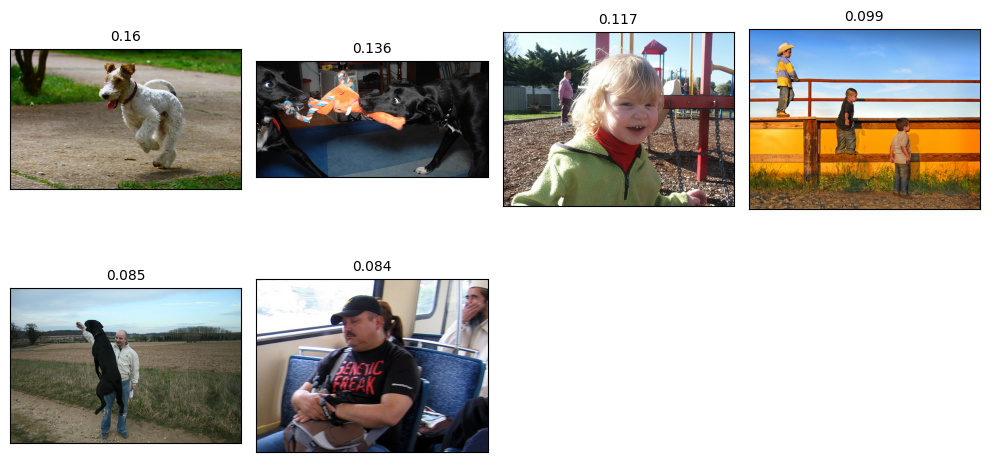

A boy flying a red and white kite .
This image is unavailable in your country in compliance with local laws.
A little boy in a green soccer uniform is running on the grass .
This image is unavailable in your country in compliance with local laws.
Two girls walking next to each other and talking .
This image is unavailable in your country in compliance with local laws.
Several dogs are running down a cement and dirt path , with two brown ones in the lead .


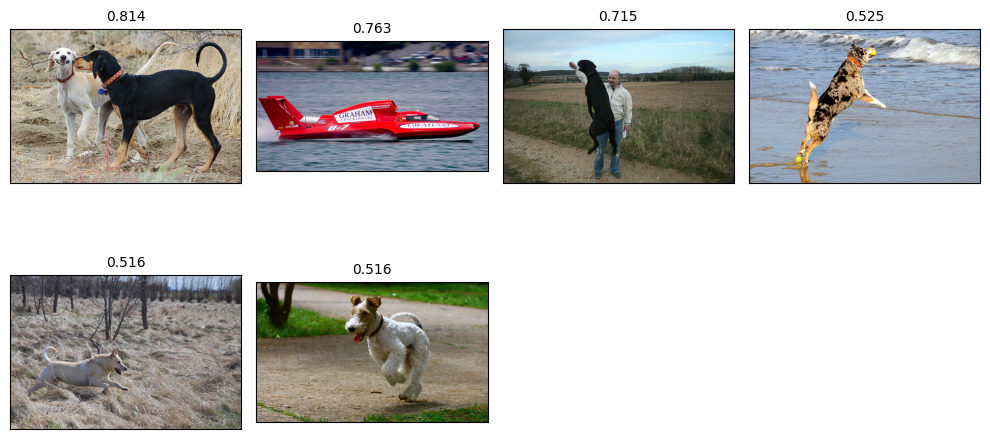

A dog walks across a puddle of water in Las Vegas .


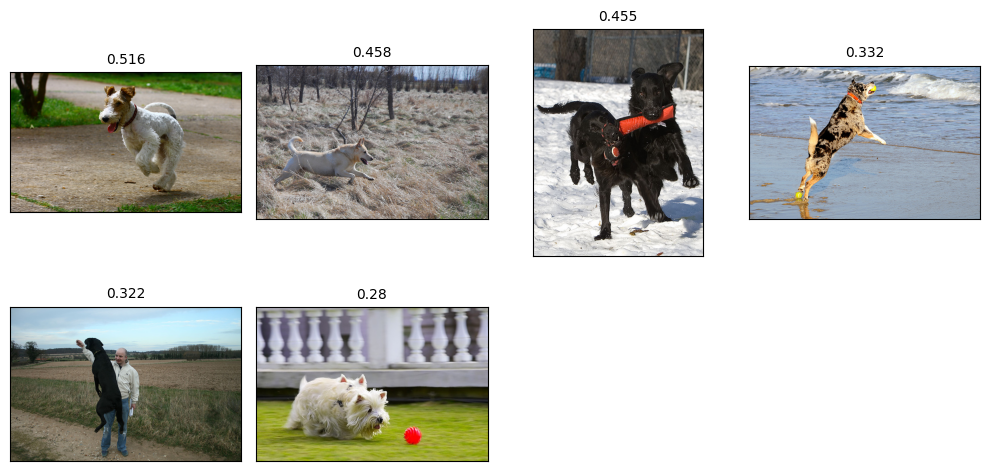

The man is standing next to a dog , while the dog jumps in the air .


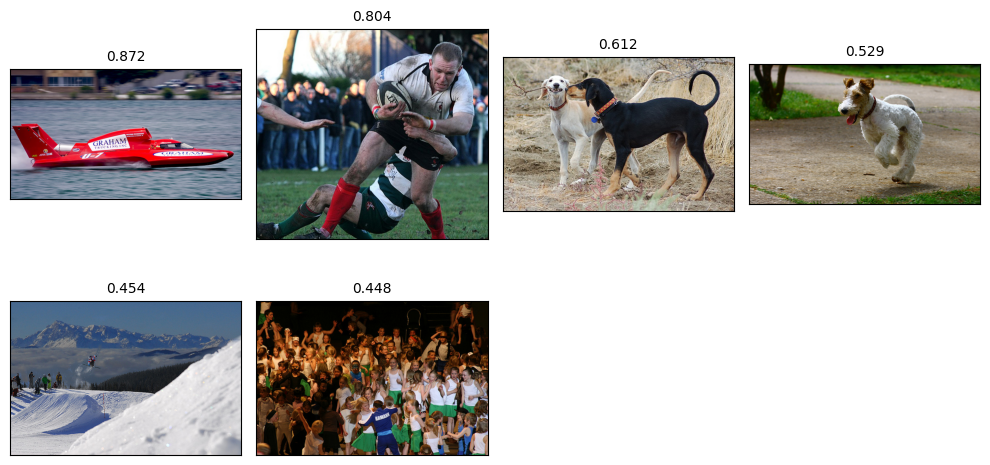

A group of women wearing red all rally together .


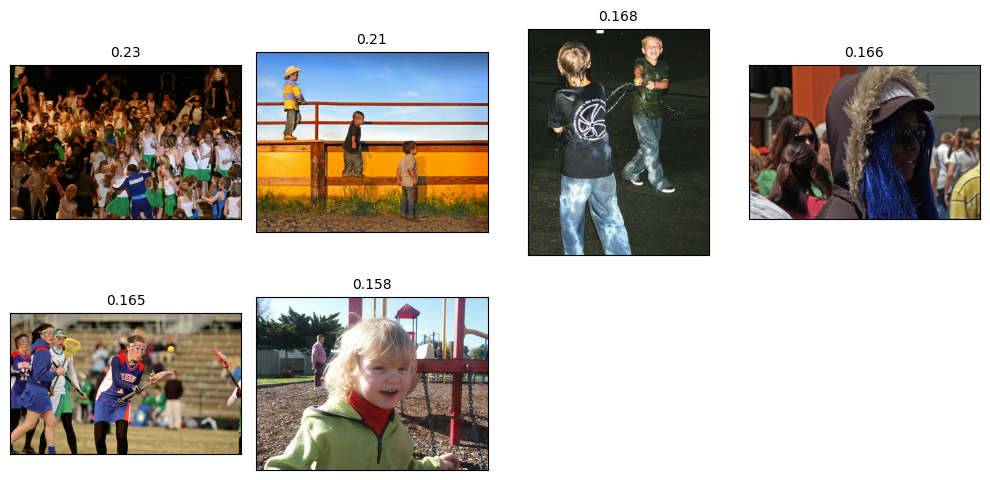

A man in a flowered bathing suit waterskies on one ski while being pulled by a rope .


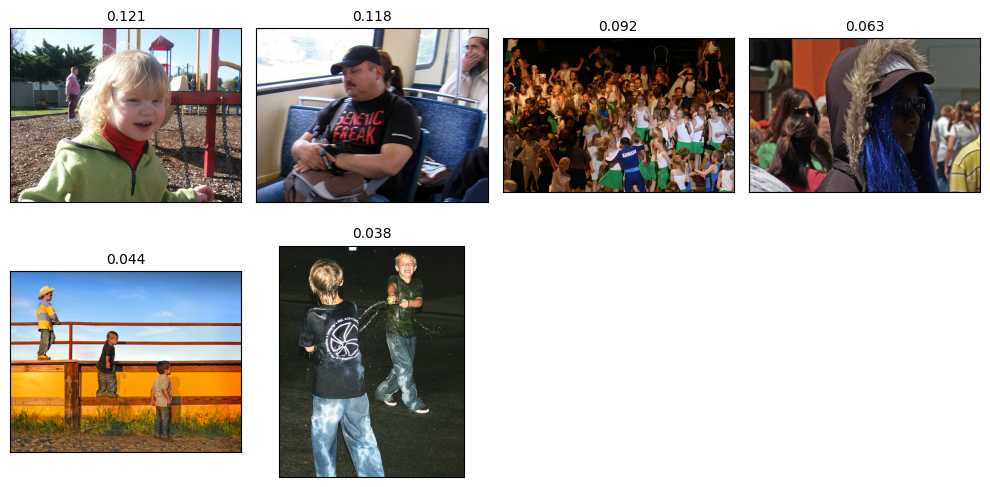

A watercraft speeds through the water .


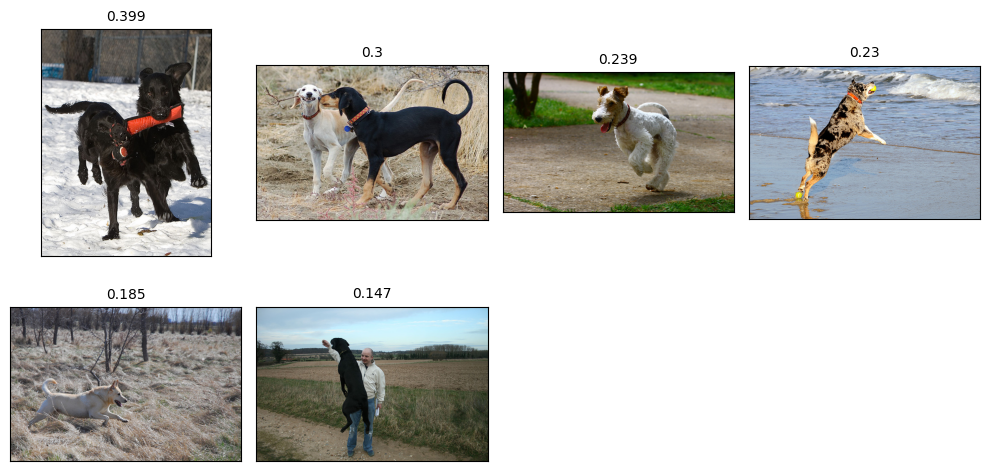

In [111]:
# Результат работы.
for s in samples: 
  print(s)
  model_test(s, legal_restrictions, test_img_tensor, rfr_model.best_estimator_, test_images)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
С точки зрения алгоритма функция работает как нужно - принимает текст, веткоризует его, и находит наилучшее соответствие среди изображений.

Да, ты прав, к сожалению работают они не очень. И причин тут несколько - мало данных, не очень правильный подход. На мой взгляд более перспективным было бы привести ембеддинги изображений и текстов к одной размерности в одно пространство (через обучаемые слои) и в качестве меры близости использовать косинусное расстояние.


</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Небольшая формальность - пожалуйста добавь в код функции инфереса, чтобы она кроме изображения и текста  выводила найденную меру близости.</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
</div>

## Общий вывод

1. Модель в общем случаи не учится искать, а создает себе пул наиболее подходящих какртинок, на все ответы. Да иногда этот пул меняеться. Но в общем случаи этот так.  Модель иногда «везет».
2. Это модель научилось хорошо искать собачек, тоже неплохо, другие хорошо искали людей.
3. Есть проблема с поиском детей т.к. картинки с детьми в тестовых данных есть, а модель не научилась их отлечать и в итоге может выдасть картинку с ребенкам на запрос не содержащий этого требования. Это плохо необходимо обучать модель со всмеми зазпросами, а потом на этапе предсказаний отсекать отдельным фильром сами картинки.
4. Сам подход не жизне способен (использовать конкатенированный вектор из требования задачи) из-за дисбаланса. Вектор текстового запроста просто теряется в массиве вектора изображения. 
5. Эту задачу предположительно можно решить так, при помощи сверточных сети разметить существующие картинки и выделить в них объекты и их количества и сделать текствое описание(теги) картинки. А потом при помощи простого измерения векторного расстояния сравнивать два текстовых вектора, вектор запроса и вектор тегов. И выдавать наиболее близкий результат. Но это другая задача.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Получены признаки из текста и изображений, обучены модели регрессии. Корректно написана функция для тестирования (инференса)
    
Пара небольших доработок:
    
 - Нужно избавиться от hardcode в путях для загрузки   
 - Пожалуйста добавь функционал вывода метрики близости для найденных изображенй.
    
И было бы круто,если ты попробуешь инференс с помощью CLIP.     
    
Жду твою работу на повторное ревью.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>

Спасибо за ревью! Дороботки произвел! Советы попробую воплотить в жизнь так сказать, уже за рамками, но эксперементы произведу. Совет с RNet очень помог и все улутшил. NN стала нормально работать, сделал тест на ней.
</div>